In [79]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
import math
from math import log

def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
# Armo las tablas en el programa
#
    
LIT=ldata("yeast_LIT.txt")
APMS=ldata("yeast_AP-MS.txt")
Y2H=ldata("yeast_Y2H.txt")
LITR=ldata("yeast_LIT_Reguly.txt")
PaHe=ldata("Essential_ORFs_paperHe.txt")
##Borro lo que sobra del archivo
del(PaHe[:2])
del(PaHe[1156:])


##Armo una lista de los nombres de nodos esenciales
nodos_esenciales=[]

for i in range(len(PaHe)):
    nodos_esenciales.append(PaHe[i][1])
nodos_esenciales1=[]
for i in nodos_esenciales:
    if i not in nodos_esenciales1:
        nodos_esenciales1.append(i)
        



G=nx.Graph()
G=nx.read_edgelist('yeast_LIT.txt')
#nx.draw(G, with_labels=False, font_weight='bold', node_size=1)
#plt.show()

    
    

esenciales_LIT=set(nodos_esenciales1).intersection(set(G.nodes()))

for nodo in G.nodes():
    G.node[nodo]["Tipo"]="No-Esencial"

for nodo_esencial in esenciales_LIT:
    G.node[nodo_esencial]["Tipo"]="Esencial"
    
        
    
lista_nodos_grados=list(G.degree())



for nodo_grado in lista_nodos_grados:
    G.node[nodo_grado[0]]["Grado"]=nodo_grado[1]
    
lista_grados=[]
for nodo_grado in lista_nodos_grados:
    lista_grados.append(nodo_grado[1])
lista_grados=set(lista_grados)

## Para cada valor de grado K me dijo cuantos enlaces esenciales hay
cuantos=[] ##Lista que tendrá la cantidad de nodos de grado k que son esenciales
for k in lista_grados:
    for nodo in G.nodes():
        if G.node[nodo]["Grado"]==k and G.node[nodo]["Tipo"]=="Esencial":
            cuantos.append(k)
            

            
enlaces_totales=len(G.nodes())
lista_grados=list(lista_grados)


cuantos_nodos_esenciales_k=[]
for i in range(1,max(lista_grados)+1):
    cuantos_nodos_esenciales_k.append(cuantos.count(i))
    

proba_nodo_esencial_k=[]
for esenciales in cuantos_nodos_esenciales_k:
    proba_nodo_esencial_k.append(esenciales/enlaces_totales)
    
proba_nodo_esencial_k1=[]
for i in proba_nodo_esencial_k:
    if i!=0:
        proba_nodo_esencial_k1.append(i)

uno_menos_pe=[1-j for j in proba_nodo_esencial_k1]

ln_uno_menos_pe=[log(k, np.e) for k in uno_menos_pe]
print(proba_nodo_esencial_k1)
print(uno_menos_pe)
print(ln_uno_menos_pe)
        ##hay que plotear proba_nodo_esencial_k vs lista de grados

[0.09049479166666667, 0.06315104166666667, 0.059244791666666664, 0.040364583333333336, 0.029296875, 0.024739583333333332, 0.024088541666666668, 0.013020833333333334, 0.016276041666666668, 0.007161458333333333, 0.009114583333333334, 0.005208333333333333, 0.005859375, 0.0032552083333333335, 0.0013020833333333333, 0.001953125, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0013020833333333333, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0013020833333333333, 0.0013020833333333333, 0.0006510416666666666]
[0.9095052083333334, 0.9368489583333334, 0.9407552083333334, 0.9596354166666666, 0.970703125, 0.9752604166666666, 0.9759114583333334, 0.9869791666666666, 0.9837239583333334, 0.9928385416666666, 0.9908854166666666, 0.9947916666666666, 0.994140625, 0.9967447916666666, 0.9986979166666666, 0.998046875, 0.9993489583333334, 0.9993489583333334, 0.9986979166666666, 0.9993489583333

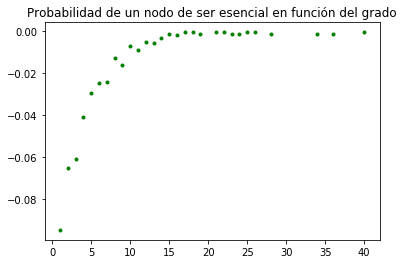

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 34, 36, 40]
AAA
[0.09049479166666667, 0.06315104166666667, 0.059244791666666664, 0.040364583333333336, 0.029296875, 0.024739583333333332, 0.024088541666666668, 0.013020833333333334, 0.016276041666666668, 0.007161458333333333, 0.009114583333333334, 0.005208333333333333, 0.005859375, 0.0032552083333333335, 0.0013020833333333333, 0.001953125, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0013020833333333333, 0.0006510416666666666, 0.0006510416666666666, 0.0013020833333333333, 0.0013020833333333333, 0.0013020833333333333, 0.0006510416666666666]


In [80]:
plt.plot(lista_grados, ln_uno_menos_pe, 'g.')
plt.title("Probabilidad de un nodo de ser esencial en función del grado")
plt.show()
print(lista_grados)
print("AAA")
print(proba_nodo_esencial_k1)




In [128]:
G.remove_nodes_from(list(nx.isolates(G)))

for vecinos in G.adjacency():
    print(vecinos[1].keys())
        
    

dict_keys(['YJR022W'])
dict_keys(['YHR099W', 'YPL254W', 'YGR252W', 'YPL047W', 'YDR167W', 'YDR176W', 'YGL066W', 'YOL148C', 'YDR145W', 'YLR055C', 'YMR236W', 'YDR448W', 'YBR198C', 'YMR223W', 'YBR081C', 'YDR392W', 'YGL112C', 'YCL010C'])
dict_keys(['YOR194C', 'YML015C', 'YER148W'])
dict_keys(['YML105C'])
dict_keys(['YOR075W', 'YLR268W', 'YDR498C'])
dict_keys(['YBR200W', 'YPR055W', 'YDR166C', 'YIL068C', 'YLR166C', 'YFL005W'])
dict_keys(['YDR510W'])
dict_keys(['YDR118W', 'YNL172W', 'YBL084C', 'YHR166C', 'YDL008W', 'YKL022C', 'YOR249C', 'YLR102C', 'YGL240W', 'YDR260C', 'YIR025W'])
dict_keys(['YLR008C', 'YNR017W'])
dict_keys(['YJR084W'])
dict_keys(['YDL028C', 'YGR092W'])
dict_keys(['YJR093C', 'YKR002W', 'YKL018W', 'YLR277C', 'YLR115W', 'YAL043C', 'YNL317W'])
dict_keys(['YLR197W', 'YOR310C', 'YER172C'])
dict_keys(['YER040W', 'YOR098C', 'YLR347C', 'YAR002W', 'YLR335W', 'YMR047C', 'YOR001W', 'YKL068W', 'YGL238W'])
dict_keys(['YHR069C', 'YOL021C', 'YCR035C', 'YDR280W', 'YOL142W', 'YOR001W', 'YOR076